# Introduction

Today's lecture was divided into two parts. First, we spent the majority of the time discussing the Bargh paper. Second, we introduced some technical concepts around the normal distribution and saw how to fit normal distributions with Bayesian inference and `pymc`.

# Puzzles about Bargh

As we discussed on the first day of class, the Bargh study was tremendously influential. Psychology at the time was very interested in how large parts of behavior can be manipulated by subtle, almost invisible forces. Daniel Kahneman has his ill-fated about the larger behavioral priming literature quote:

   >disbelief is not an option. The results are not made up, nor are they statistical flukes. You have no choice but to accept that the major conclusions of these studies are true. (2012)
    
And yet in 2012, a [major effort](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0029081) to replicate the Bargh paper couldn't find the same results. Our question then: could anyone have known there was something wrong back in 1996 when the study was first conducted? Were there clues of bad design or statistical flukes? Or was Bargh an innocent victim of bad luck? Sometimes you conduct a perfectly good study and the numbers just work out to make it look like there is an effect when there isn't one.

We read over part of the study closely in class and discussed potential flaws. Here is a summary of that discussion.

## Random variation

People walk faster or slower for all kinds of reasons. Sometimes you are tall and tall people walk a bit faster. Sometimes you are sleepy and walk a bit slower. Sometimes you are late for class after the experiment and that encourages you walk a bit faster.

Many students pointed out that there was no effort made to measure their baseline walking speed before the experiment. This makes it hard to interpret the results. After all, if a few more tall people end up in the control group and more short people end up in the treatment group, you can get an effect where it looks like the priming causes people to walk slower. But really it is just because your groups are unbalanced.

I think this is a plausible alternative explanation. However, it is worth appreciating that Bargh and colleague took measures to prevent this sort of problem:

The **first** is randomization: if we randomly allocate 30 people to two different groups, then we should expect, typically, the average height in both groups to be the same. Randomization is a powerful tool for handling concerns about groups becoming unbalanced. As you sample size gets bigger and bigger, the randomization procedure should balance every extra factor that might effect walking speeds except for the priming intervention itself. However, randomization at low sample sizes provides no gauruntees. Even though you should expect the two groups to be balanced, it is fairly easy to, in practice, get unbalanced groups. For example, suppose I had 6 people in my study and these are their heights:

In [44]:
heights = [6,8,8,6,6,9]

If I randomly split these folks up, it will be impossible to get the groups to be balanced (to have the same average height) 

In [84]:
import random

random.shuffle(heights) # randomly reorder the pieces
g1 = heights[:3] # the first three people
g2 = heights[3:] # the last three people

np.mean(g1),np.mean(g2)

(6.666666666666667, 7.666666666666667)

So while the randomization argument gives you assurance in theory, it doesn't in practice. Instead, we need some model to quantify how much likely we are to experience unbalancedness by incorporating information about the sample size along with a model of variation. Hence, we need normal distributions and t-tests.

The **second** is the use of normal distributions to model the data. As we will see next time, the normal distribution represents most causal processes where you think there should be some baseline quantity (like walking speed) and then people vary around that baseline acrossing to a myriad of factors. The idea is that we can use Bayesian estimation to seperate out the components: the baseline walking speed vs the random variation. Then we can compare the baseline walking speed of the control and treatment group. If they are different, that points to an effect due to priming, not due to random variation (like going to bed late).

I said earlier that normal distributions represent *most* processes with a baseline + variance. There are some exceptions that we'll learn about on Monday. Just like with the binomial distribution. Lots of causal processes end up making distributions that are binomial (as you learned on your unit one assignment). But not every process does that (the hot hands model, hetereogenous participants). So one of our goals in the next class is to figure out when the normal distribution is appropriate vs it's hetereogenous cousin, the Student's T distribution.

The **third** is the t-test. It combines these two ideas: (1) if we randomly sort people into two groups, and (2) their walking speed can be decomposed into a variance and a mean, then how often would we observe big difference between them when there isn't really a difference in their baseline walking speeds? This provides a way of quantifying how often we might be tricked by random variation alone. In the Bargh study, they found that odds of finding a difference in walking speeds erroneously is very slim, less then 5%. The details of the argument behind the t-test will wait til next class.

In short, we are right there thing that the data is noisy - there a loads of unmeasured sources of variation. But we are not right to think that is necessarily a problem. The standard practice of deploying t-tests in cognitive science papers is meant to quantify how much of a problem this is. This isn't to say there is no cause for concern. Once we see the assumptions that go into a t-test, we can understand when they are likely to be violated and how to address that problem.

## Measurement error

Operating a stopwatch with precision is hard. Our reflexes are slow, the machine might be cumbersome, its hard to judge *exactly* when someone crosses a threshold. So we should expect this study to come with a fair bit of measurement error. This is, much like being late for class or being tall, a source of random variation. But it is not a kind of random variation that the t-test knows about. The t-test only knows about the numbers we give it. When we hand the t-test a list of numbers, it treats those numbers as known exactly. In reality though, there is wiggle room in those numbers. Maybe it's possible that the wiggle room is so much that the t-test delivers unreliable results.

To give us a sense of how much measurement error there might be, we did a quick exercise. I walked across the white board in the front of the classroom toward a designated line and all the students timed me. We reported the scores on canvas and I've reproduced them below.

In [86]:
speeds = [2.79,3.18,2.93,2.89,3.39,3.35,3.45,3.43,3.49,2.69,3.13,2.68,4.63,3.01,3.53,2.53,2.63]

In our case, there is a fair bit of variation.

(3.1605882352941177, 0.4891946633857744)

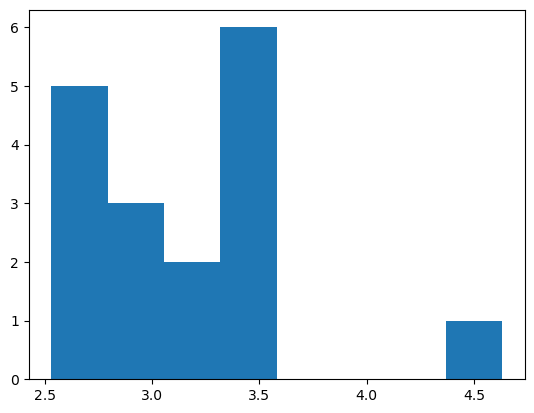

In [91]:
plt.hist(speeds,bins=8)
np.mean(speeds),np.std(speeds)

Now the classroom and the Bargh experiment are not exactly the same. But this can give us a sense of how much measurement error there might be. In two class periods, we'll construct models that explicitly incorporate measurement error right into our Bayesian statistics and our hypothesis tests. We'll see whether this argument works - could there be enough measurement error that the study would erroneously detect an effect that doesn't exist?

## Systematic variation

The first two problems deal with random variation - sources of variation in walking speed that are randomly distributed between our two groups. Normally, these problems are not so bad. All we want to find out is whether the baseline walking speed between the two groups differs. But there is another kind of problem that is much more serious: systematic variation. If the two groups differ in more than one way, it's hard to say which way is responsible for the results.

One student noted that experimenter expectations might be able to subtle or non-subtlely influence the results. The thought is that the experimenter might introduce extra causes of variation between the control and primed group other than the priming itself. Bargh and company have this to say for themselves:

>The experimenter kept himself blind
to condition by prepackaging the various scrambled-sentence tasks and
picking packets randomly when the participant arrived at the laboratory
waiting area.

I'll leave it to you as to whether this a credible argument. But if you don't think it is, then that spells serious trouble for the experiment.

# Normal distributions and pymc

I also want to walk you through some coding aspects. Much of the code will be familiar so my comments will be brief.

## Extract data

In [109]:
import pandas as pd
import pymc as pm
import arviz as az
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/daniel-saunders-phil/cogs-303/main/bargh_experiment_2_data'

data = pd.read_csv(url)
data

,group,speeds
0,0.0,9.610
1,0.0,7.110
2,0.0,7.880
3,0.0,7.380
4,0.0,7.050
5,0.0,8.510
6,0.0,8.260
7,0.0,8.680
8,0.0,7.860
9,0.0,9.020


In [110]:
control = data[data.group == 1]
primed = data[data.group == 0]

In [111]:
control_speed = control.speeds.values
primed_speed = primed.speeds.values

## Normal distributions

You're already seen the normal distribution before in this class. But now it is worth making some features of the distribution explicit.

- It has two parameters, the mean and standard deviation. The mean controls the center and the standard deviation controls the spread.
- The mean can be any number, postive or negative.
- The standard deviation must be positive. Distributions cannot have zero spread or negative spread. Once it's as skinny as a straight vertical line, it stops being a distribution.
- The normal distribution looks like a binomial, but they are different. First, binomials are for discrete things, things that come as 1, 2, 3, 4, etc... Normals are for continuous things, things that come as 1.1, 1.11, 1.1111. For example, time and walking speed are continuous because between any two increments of time, you can always imagine a smaller increment and it's well defined. But for binomials that's not true - you cannot get 1 and a half cups correct.

You can also slide the sliders to get a sense of how the distribution behaves across parameters.

In [29]:
import ipywidgets as widgets

def draw_normal(mean,std):
    
    x = np.linspace(0,50,200)
    y = stats.norm(mean,std).pdf(x)
    y = y / sum(y)

    plt.plot(x,y)

widgets.interact_manual(draw_normal,
                 mean=widgets.FloatSlider(min=0, max=50, step=0.01, value=25),
                 std=widgets.FloatSlider(min=0, max=50, step=0.01, value=5))

interactive(children=(FloatSlider(value=25.0, description='mean', max=50.0, step=0.01), FloatSlider(value=5.0,…

<function __main__.draw_normal(mean, std)>

## Designing priors

Designing priors for normal distributions is a bit tricky. Normally, we graviate toward flat priors unless we have some extra information. But as we say with the beta-binomial distribution, sometimes a flat prior isn't really flat. Let me show you what I mean.

### The flat option (bad)

Suppose we constructed a grid that said the mean could be anywhere between 0 and 15, while the standard deviation could be anywhere between the same.

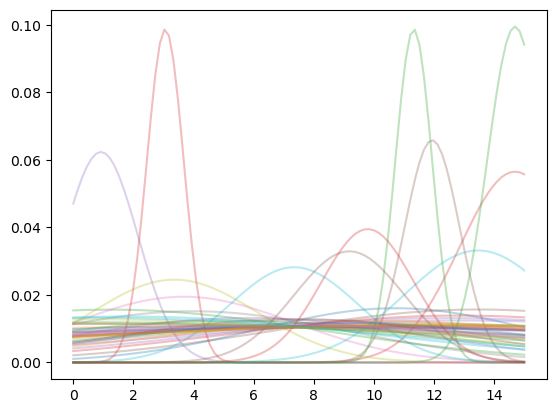

In [102]:
mean_grid = np.linspace(0,15)
std_grid = np.linspace(0,15)

mean_prior = np.ones(len(mean_grid))
mean_prior = mean_prior / sum(mean_prior)
std_prior = np.ones(len(std_grid))
std_prior = std_prior / sum(std_prior)

x = np.linspace(0,15,100)

for i in range(50):
    m = np.random.choice(mean_grid,p=mean_prior)
    s = np.random.choice(std_grid,p=std_prior)
    
    y = stats.norm(m,s).pdf(x)
    y = y / sum(y)
    
    plt.plot(x,y,alpha=0.3)

Here is what 50 possible distributions might look like. One thing to notice is that many of these distributions are completely implausible. 

First, there are tall distributions that are near zero. In particular, I have this tall orange one in mind. This is like saying we expect all our participants to have walking speeds around 2-5 seconds. But two seconds is extremely fast for a 9 meter hallway! That person is almost sprinting. Of course it's not impossible for some participants to sprint. But it is unlikely and our priors should reflect that. This points toward the need to have means that are bit larger.

Second, some of these distributions are very flat, suggesting huge variation in walking speed. This is unrealistic. In human societies, we walk at similar paces. If everyone picked a radically different speed, sidewalks would be a mess. More importantly, some of these distributions imply some people should walk with negative speeds. That's impossible. We've only visualized the scale of 0-15. But the line does extend in both directions off the graph. 

### The non-flat option (good)

The trouble with both of those distribution is that flat priors are not really as non-committal as we might like. We tried to not assert very much by keeping our priors flat but we end up making really wacky predictions. 

For the prior on means, it is often good to pick a normal distribution. That gives us some best guess and then our uncertainty fans out around that best guess. This means we can avoid asserting really fast speeds if we want to.

In [103]:
mean_prior = stats.norm(10,10).pdf(mean_grid)
mean_prior = mean_prior / sum(mean_prior)

Here my best guess is 10. I can also put some uncertainty around that best guess with the standard deviation. Here I've put a lot of uncertainty to show that we do not need to make a strong, bold assumption but we can still do better than the flat prior. you might be more or less certain than in our guess of 10 and pick a different number. That's okay. The important thing isn't that you settle on the same numbers I do but your procedure for generating the numbers. The plan is to repeatedly visualize our predictions and incrementally improve them.

For standard deviations, the exponential prior is often a good choice. First, it has the same exact range as the standard deviation itself - all positive numbers. Second, it discounts really extremely high standard deviations. That makes sense in our context. Finally, we can also adjust our uncertainty. If we want to stay very non-committal, we can increase the uncertainty as much as we like.

In [104]:
std_prior = stats.expon(1).pdf(std_grid)
std_prior = std_prior / sum(std_prior)

Now we'll visualize

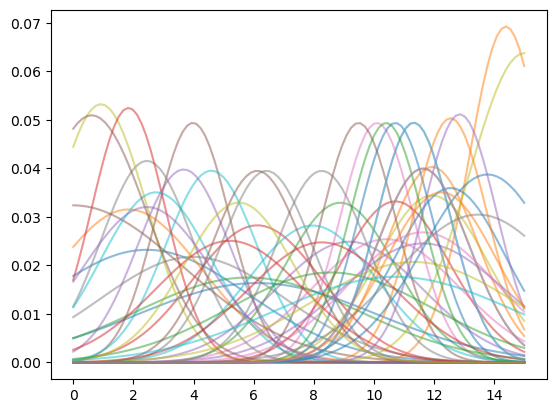

In [106]:
x = np.linspace(0,15,100)

for i in range(50):
    m = np.random.choice(mean_grid,p=mean_prior)
    s = np.random.choice(std_grid,p=std_prior)
    
    y = stats.norm(m,s).pdf(x)
    y = y / sum(y)
    
    plt.plot(x,y,alpha=0.5)

This looks much more plausible. First, the distributions are well-mixed, meaning that there are lots of plausible shapes according to the priors. The estimation procedure will try to figure out which of those shapes is the best but we need to hand it a good list of candidates first. The flat priors ended up giving a very narrow list of candidate shapes where mostly they just hugged the bottom of the x-axis.

Second, the lines get a little bit denser on the right side compared to the left side. That's all a good sign. That reflects our belief there should be very few people sprinting down the hallway.

I actually think we can do better still on the sprinter problem. A fair number of these distributions way everyone's walking speed is close to 0 seconds for the hallway. That's also implausible. So let's tighten up the prior over the means a little bit.

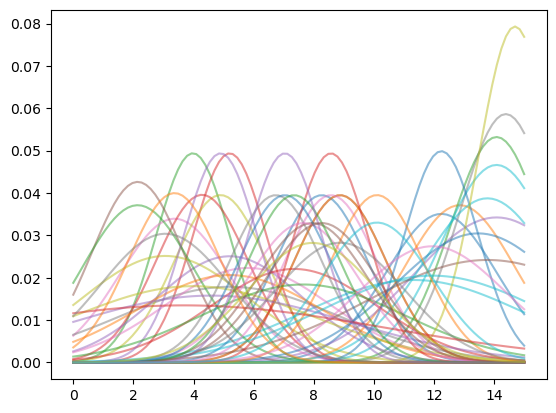

In [107]:
mean_prior = stats.norm(10,5).pdf(mean_grid) # dropped from 10 to 5
mean_prior = mean_prior / sum(mean_prior)

x = np.linspace(0,15,100)

for i in range(50):
    m = np.random.choice(mean_grid,p=mean_prior)
    s = np.random.choice(std_grid,p=std_prior)
    
    y = stats.norm(m,s).pdf(x)
    y = y / sum(y)
    
    plt.plot(x,y,alpha=0.5)

This looks even better. The general lesson here is that you often want to go through multiple iterations of prior tuning before turning to the data. Prune away implausible lines a little bit at a time until this picture is well-mixed in the space of plausible outcomes.

## Pmyc code

Here is how we convert those priors into pymc code.

In [112]:
with pm.Model() as m0:
    mean = pm.Normal('mean',10,5) # these numbers for the priors are taken directly from our plotting code.
    std = pm.Exponential('std',1) 
    
    y = pm.Normal('y',mean,std,observed=primed_speed)
    trace_primed = pm.sample()
    
with pm.Model() as m1:
    mean = pm.Normal('mean',10,5)
    std = pm.Exponential('std',1)
    
    y = pm.Normal('y',mean,std,observed=control_speed)
    trace_control = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean, std]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mean, std]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


How to visualize them.

array([<AxesSubplot: title={'center': 'mean'}>,
       <AxesSubplot: title={'center': 'std'}>], dtype=object)

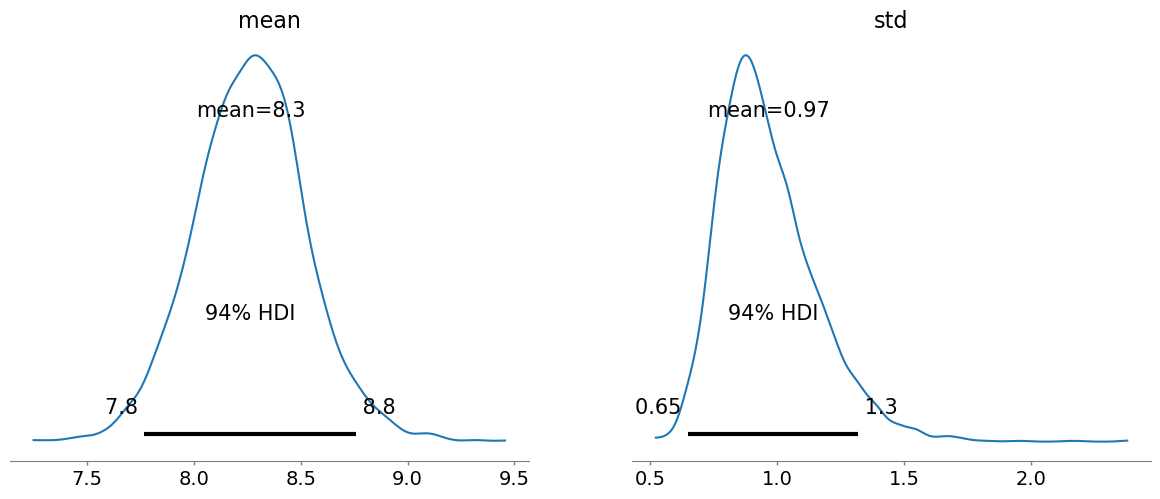

In [113]:
az.plot_posterior(trace_primed)

array([<AxesSubplot: title={'center': 'mean'}>,
       <AxesSubplot: title={'center': 'std'}>], dtype=object)

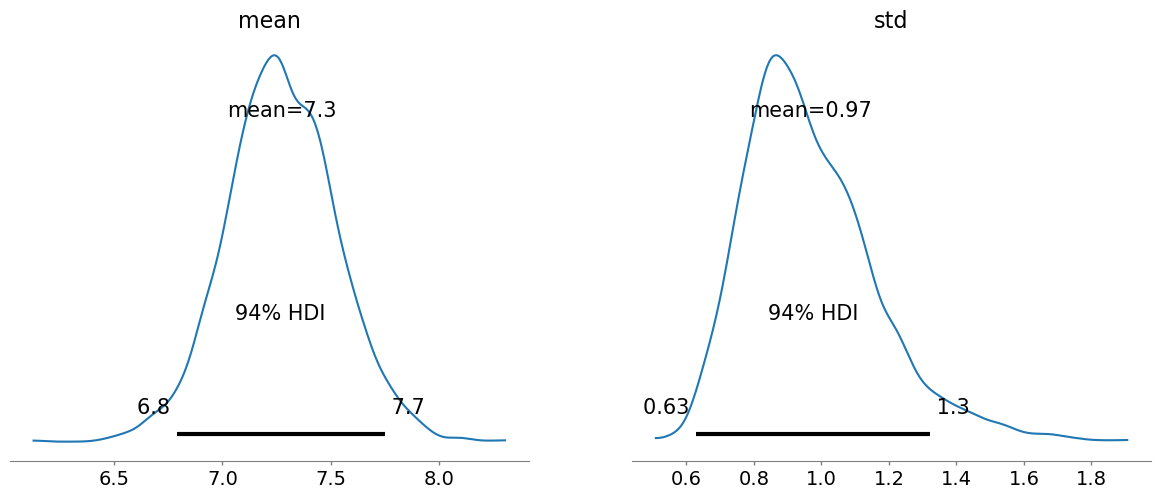

In [114]:
az.plot_posterior(trace_control)

Okay so earlier in the lecture I said that the goal in statistical modeling of this sort of data is partition out the sources of random variation from the quantity of interest. We want to figure out the average walking speed of each group and compare them. But what we get is a bunch of individual walking speeds that vary widely. The Bayesian estimation technique is trying to identify a plausible mean value for each group as it also tries to measure how much variation there is around that mean value.

## Comparing parameters

By comparing the estimated means of each group, we can get a sense of the effect size - how much slower should people walk once they are primed.

This histogram here is just the substraction of each posterior from the two groups. It shows we expect the primed group to walk about 1 second slower. But there is uncertainty in that estimate - they might walk as much as 2 seconds slower or walk at the same speed.

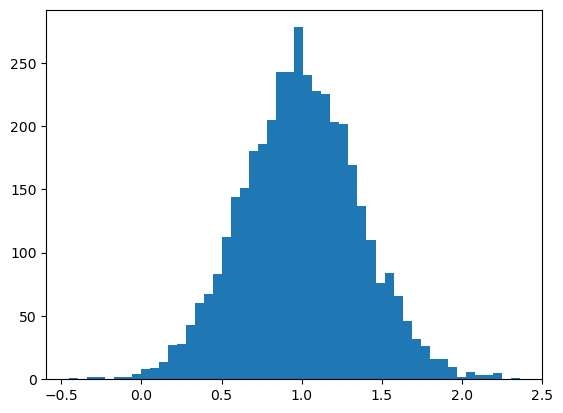

In [115]:
diffs = trace_primed.posterior['mean'].values.flatten() - trace_control.posterior['mean'].values.flatten()
plt.hist(diffs,bins=50);

## Comparing predictions

We can also extract predictions about what we think future groups walking speeds should look like.

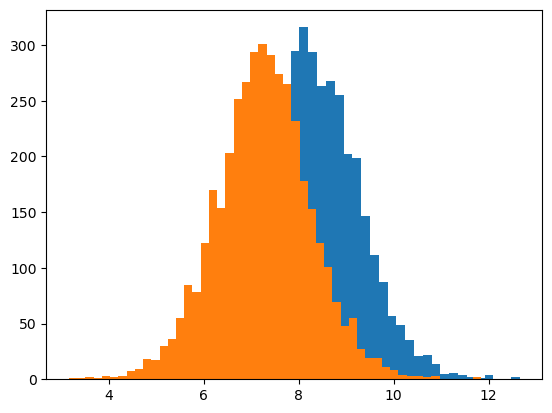

In [116]:
m_primed = trace_primed.posterior['mean'].values.flatten()
std_primed = trace_primed.posterior['std'].values.flatten()

m_control = trace_control.posterior['mean'].values.flatten()
std_control = trace_control.posterior['std'].values.flatten()

y1 = stats.norm(m_primed,std_primed).rvs()
y2 = stats.norm(m_control,std_control).rvs()

plt.hist(y1,bins=50);
plt.hist(y2,bins=50);